In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.optimize import curve_fit

#Først behandles dataen til at finde relaterede størrelser og puttes distincte arrays:
class data:
    def __init__(self,data):
        #Dataarrays tages fra datafilen
        self.t,ylod = np.loadtxt(data, unpack = True, usecols=(0,2), skiprows=2)
        self.y = -ylod #det negative y er fordi at vi er interesseret i magnetens bevægelse, ikke loddet.
        
        #y-akse hastigheden findes:
        self.v = (self.y[1:]-self.y[:-1])/(self.t[1:]-self.t[:-1])
        
        #t gennemsnit (relevant når tid skal tilknyttes til hastigheder)
        self.tgen = (self.t[1:]+self.t[:-1])/2
    
data = data("./Induktionsbremsedata/Induktionsbremse datatest.txt")

class error: #Fejlen findes ved at finde gennemsnitsforskellen på 3 trackninger af samme forsøg
    def __init__(self,errdata,datalength):
        ylod1,ylod2,ylod3,ylod4 = np.loadtxt(errdata, unpack = True, usecols=(1,2,3,4), skiprows=3)
        self.y1,self.y2,self.y3,self.y4 = -ylod1,-ylod2,-ylod3,-ylod4
        
        self.yerr = sum((abs(self.y1-self.y2)+abs(self.y3-self.y4))/2)/len(self.y1) #positionsfejl
        self.yerrs = np.full(datalength, self.yerr)
        
        self.verr = np.sqrt(2)*self.yerr #hastighedsfejl
        self.verrs = np.full(datalength-1,self.verr)
        
fejl = error("./Induktionsbremsedata/Induktionsbremse fejltest.txt",len(data.t))

#Fitteclass
class fit:
    def __init__(self,func,x,y,guess,yerr):
        self.popt, self.pcov = curve_fit(func,x,y,p0=guess,sigma=yerr,absolute_sigma=True) #Fit dannes
        
        #Plotteværdier til fit
        self.xs = np.linspace(min(x),max(x),10000)
        self.ys = func(self.xs,*self.popt)
        
        #Goodness of fit
        self.chimin = np.sum(((y-func(x, *self.popt))/yerr)**2) #Chimin findes ud fra ligning 5.9 i HH
        self.df = len(y)-len(self.popt) #degrees of freedom
        self.P = ss.chi2.sf(self.chimin,self.df) #P-værdien ved antal frihedsgrader for det givne polynomie findes.
        
        

#Plotteclass
class plot:
    def __init__(self,x,y,yerr,label,xlabel,ylabel,title,marker,ls,capsize):
        ax.errorbar(x,y,yerr=yerr,label=label, marker=marker,ls=ls,capsize=capsize)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.legend()
        ax.grid()
        fig.tight_layout()
        
class fitplot:
    def __init__(self,x,y,yerr,label):
        ax.plot(x,y,label=label)
        ax.legend()
        fig.tight_layout()
    


In [2]:
#Fitning efter konstant acceleration (uden vindmodstand)
def afunc(t,*p):
    s0 = p[0]
    v0 = p[1]
    a = p[2]
    return s0+(v0*t)+(1/2)*a*(t**2)

afit = fit(afunc,data.t,data.y,[-0.15,-3,2],fejl.yerrs)


#Fitning med vindmodstand


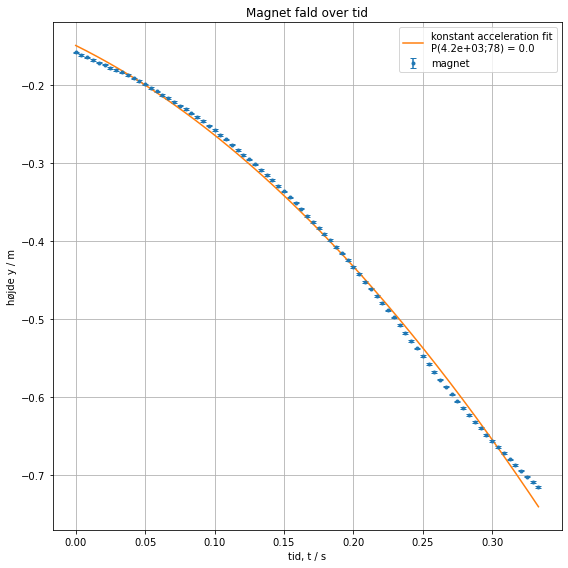

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
plot(data.t,data.y,fejl.yerrs,'magnet','tid, t / s','højde y / m', 'Magnet fald over tid', '.', ' ',3)
fitplot(afit.xs,afit.ys,fejl.yerrs,'konstant acceleration fit'+'\n'+'P({:1.2};{}) = {:1.2}'.format(afit.chimin,afit.df,afit.P))

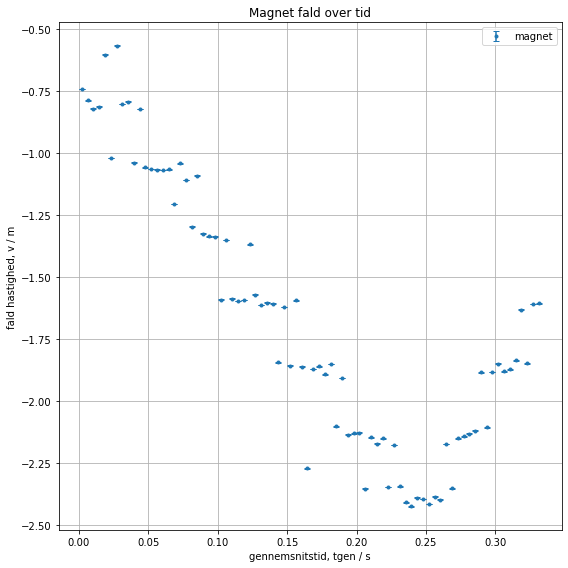

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
plot(data.tgen,data.v,fejl.verrs,'magnet','gennemsnitstid, tgen / s','fald hastighed, v / m', 'Magnet fald over tid', '.', ' ',3)